# Facenet definition

FaceNet, that directly learns a mapping from face images to a compact Euclidean space where distances directly correspond to a measure of face similarity.

Our method uses a deep convolutional network trained to directly optimize the embedding itself, rather than an intermediate bottleneck layer as in previous deep learning approaches.



https://machinelearningmastery.com/how-to-develop-a-face-recognition-system-using-facenet-in-keras-and-an-svm-classifier/



Another prominent project is called FaceNet by David Sandberg that provides FaceNet models built and trained using TensorFlow. The project looks mature, although at the time of writing does not provide a library-based installation nor clean API. Usefully, David’s project provides a number of high-performing pre-trained FaceNet models and there are a number of projects that port or convert these models for use in Keras.
https://github.com/davidsandberg/facenet

A notable example is Keras FaceNet by Hiroki Taniai. His project provides a script for converting the Inception ResNet v1 model from TensorFlow to Keras. He also provides a pre-trained Keras model ready for use.
https://github.com/nyoki-mtl/keras-facenet

In [ ]:
# example of loading the keras facenet model
from tensorflow.keras.models import load_model
# load the model
model = load_model('facenet_keras.h5')
# summarize input and output shape
print(model.inputs)
print(model.outputs)

# MTCNN
Face detection is the process of automatically locating faces in a photograph and localizing them by drawing a bounding box around their extent.

In this tutorial, we will also use the Multi-Task Cascaded Convolutional Neural Network, or MTCNN, for face detection, e.g. finding and extracting faces from photos. This is a state-of-the-art deep learning model for face detection, described in the 2016 paper titled “Joint Face Detection and Alignment Using Multitask Cascaded Convolutional Networks.”

In [ ]:
# confirm mtcnn was installed correctly
from mtcnn import MTCNN
# print version
print(MTCNN.__version__)

uint8
(2448, 3264, 3)


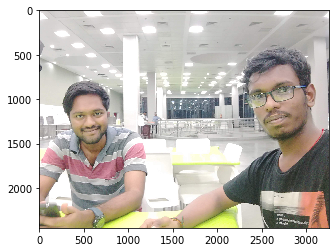

In [1]:
#Using PIL we take Image package to convert image as a numpy array
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
from numpy import asarray
# load image as pixel array
image = image.imread('two_people.jpg')
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()
# load image from file
image = Image.open("two_people.jpg")
# convert to RGB, if needed
image = image.convert('RGB')
# convert to array
pixels = asarray(image)

In [ ]:
# function for face detection with mtcnn
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN

# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# load the photo and extract the face
pixels = extract_face('...')